#### .

In [117]:
!python -m pip install --upgrade pip
!pip3 uninstall d2l -y
!pip3 uninstall tensorflow -y
!pip3 uninstall numpy -y
!pip3 uninstall matplotlib -y
!pip3 install d2l
!pip3 install tensorflow
!pip3 install pandas==1.3.5
!pip3 install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: d2l 0.17.6
Uninstalling d2l-0.17.6:
  Successfully uninstalled d2l-0.17.6
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached d2l-0.17.6-py3-none-any.whl (112 kB)
  Using cached numpy-1.21.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.9 MB)
  Using cached matplotlib-3.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.9 MB)
  Using cached pandas-1.2.4-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: pandas
    Fou

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires pandas>=1.3.0, but you have pandas 1.2.4 which is incompatible.
d2l 0.17.6 requires numpy==1.21.5, but you have numpy 1.23.5 which is incompatible.
mizani 0.8.1 requires pandas>=1.3.5, but you have pandas 1.2.4 which is incompatible.
plotnine 0.10.1 requires pandas>=1.3.5, but you have pandas 1.2.4 which is incompatible.
xarray 2022.12.0 requires pand

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.6 requires numpy==1.21.5, but you have numpy 1.23.5 which is incompatible.
d2l 0.17.6 requires pandas==1.2.4, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires requests>=2.27.0, but you have requests 2.25.1 which is incompatible.
yfinance 0.2.18 requires requests>=2.26, but you have requests 2.25.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.6 requires matplotlib==3.5.1, but you have matplotlib 3.7.1 which is incompatible.
d2l 0.17.6 requires numpy==1.21.5, but you have numpy 1.23.5 which is incompatible.
d2l 0.17.6 requires pandas==1.2.4, but you have pandas 1.3.5 which is incompatible.


In [118]:
%matplotlib inline
import time
import numpy as np
import inspect
import collections
from IPython import display
import tensorflow as tf

def add_to_class(Class):
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

class HyperParameters():
    """The base class of hyperparameters."""
    def save_hyperparameters(self, ignore=[]):
        frame = inspect.currentframe().f_back
        _, _, _, local_vars = inspect.getargvalues(frame)
        self.hparams = {k:v for k, v in local_vars.items()
                        if k not in set(ignore+['self']) and not k.startswith('_')}
        for k, v in self.hparams.items():
            setattr(self, k, v)

In [119]:
class ProgressBoard(HyperParameters):
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        Point = collections.namedtuple('Point', ['x', 'y'])
        if not hasattr(self, 'raw_points'):
            self.raw_points = collections.OrderedDict()
            self.data = collections.OrderedDict()
        if label not in self.raw_points:
            self.raw_points[label] = []
            self.data[label] = []
        points = self.raw_points[label]
        line = self.data[label]
        points.append(Point(x, y))
        if len(points) != every_n:
            return
        mean = lambda x: sum(x) / len(x)
        line.append(Point(mean([p.x for p in points]),
                          mean([p.y for p in points])))
        points.clear()
        if not self.display:
            return
        d2l.use_svg_display()
        if self.fig is None:
            self.fig = d2l.plt.figure(figsize=self.figsize)
        plt_lines, labels = [], []
        for (k, v), ls, color in zip(self.data.items(), self.ls, self.colors):
            plt_lines.append(d2l.plt.plot([p.x for p in v], [p.y for p in v],
                                          linestyle=ls, color=color)[0])
            labels.append(k)
        axes = self.axes if self.axes else d2l.plt.gca()
        if self.xlim: axes.set_xlim(self.xlim)
        if self.ylim: axes.set_ylim(self.ylim)
        if not self.xlabel: self.xlabel = self.x
        axes.set_xlabel(self.xlabel)
        axes.set_ylabel(self.ylabel)
        axes.set_xscale(self.xscale)
        axes.set_yscale(self.yscale)
        axes.legend(plt_lines, labels)
        display.display(self.fig)
        display.clear_output(wait=True)

In [120]:
class Module(tf.keras.Model, HyperParameters):
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()
        self.training = None

    def loss(self, y_hat, y):
        return cross_entropy(y_hat, y)

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def call(self, X, *args, **kwargs):
        if kwargs and "training" in kwargs:
            self.training = kwargs['training']
        return self.forward(X, *args)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.numpy(), (
            'train_' if train else 'val_') + key, every_n=int(n))
    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

class DataModule(HyperParameters):
    """The base class of data."""
    def __init__(self, root='../data'):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

class Trainer(HyperParameters):
    """The base class for training models with data."""
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.save_hyperparameters()
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        self.model.training = True
        for batch in self.train_dataloader:
            with tf.GradientTape() as tape:
                loss = self.model.training_step(self.prepare_batch(batch))
            grads = tape.gradient(loss, self.model.trainable_variables)
            if self.gradient_clip_val > 0:
                grads = self.clip_gradients(self.gradient_clip_val, grads)
            self.optim.apply_gradients(zip(grads, self.model.trainable_variables))
            self.train_batch_idx += 1
        if self.val_dataloader is None:
            return
        self.model.training = False
        for batch in self.val_dataloader:
            self.model.validation_step(self.prepare_batch(batch))
            self.val_batch_idx += 1
    def prepare_batch(self, batch):
        return batch

In [121]:
class Classifier(Module):
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [122]:
class FashionMNIST(DataModule):
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        self.train, self.val = tf.keras.datasets.fashion_mnist.load_data()

In [123]:
class LinearRegression(Module):
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        initializer = tf.initializers.RandomNormal(stddev=0.01)
        self.net = tf.keras.layers.Dense(1, kernel_initializer=initializer)

In [124]:
@add_to_class(LinearRegression)
def forward(self, X):
    return self.net(X)

In [125]:
@add_to_class(LinearRegression)
def loss(self, y_hat, y):
    fn = tf.keras.losses.MeanSquaredError()
    return fn(y, y_hat)

In [126]:
@add_to_class(LinearRegression)
def configure_optimizers(self):
    return tf.keras.optimizers.SGD(self.lr)

In [127]:
@add_to_class(LinearRegression)
def get_w_b(self):
    return (self.get_weights()[0], self.get_weights()[1])

In [128]:
class FashionMNIST(DataModule):
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        self.train, self.val = tf.keras.datasets.fashion_mnist.load_data()

In [130]:
@add_to_class(DataModule)
def get_tensorloader(self, tensors, train, indices=slice(0, None)):
    tensors = tuple(a[indices] for a in tensors)
    shuffle_buffer = tensors[0].shape[0] if train else 1
    return tf.data.Dataset.from_tensor_slices(tensors).shuffle(
        buffer_size=shuffle_buffer).batch(self.batch_size)

@add_to_class(LinearRegression)
def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader((self.X, self.y), train, i)

## 5.1. **Multilayer Perceptrons**

In [131]:
class LinearRegression(Module):
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        initializer = tf.initializers.RandomNormal(stddev=0.01)
        self.net = tf.keras.layers.Dense(1, kernel_initializer=initializer)

In [132]:
%matplotlib inline
import tensorflow as tf
from d2l import torch as d2l

#### 5.1.2. Activation Functions

##### ReLU Function

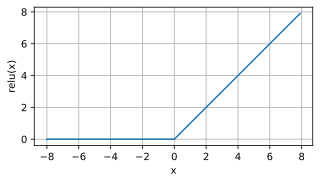

In [133]:
x = tf.Variable(tf.range(-8.0, 8.0, 0.1), dtype=tf.float32)
y = tf.nn.relu(x)
d2l.plot(x.numpy(), y.numpy(), 'x', 'relu(x)', figsize=(5, 2.5))

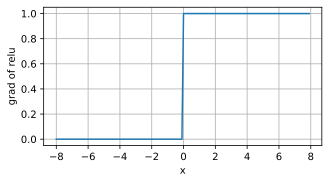

In [134]:
with tf.GradientTape() as t:
    y = tf.nn.relu(x)
d2l.plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'grad of relu',
         figsize=(5, 2.5))

##### 5.1.2.2. Sigmoid Function

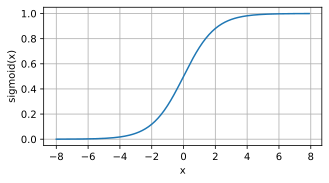

In [135]:
y = tf.nn.sigmoid(x)
d2l.plot(x.numpy(), y.numpy(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

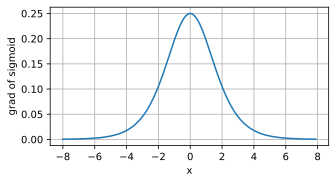

In [136]:
with tf.GradientTape() as t:
    y = tf.nn.sigmoid(x)
d2l.plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'grad of sigmoid',
         figsize=(5, 2.5))

##### 5.1.2.3. Tanh Function

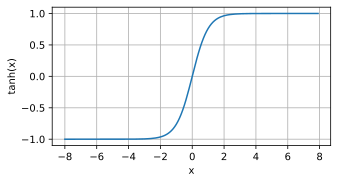

In [137]:
y = tf.nn.tanh(x)
d2l.plot(x.numpy(), y.numpy(), 'x', 'tanh(x)', figsize=(5, 2.5))

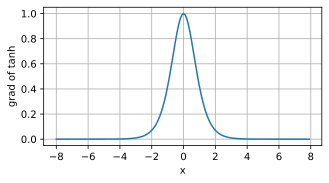

In [138]:
with tf.GradientTape() as t:
    y = tf.nn.tanh(x)
d2l.plot(x.numpy(), t.gradient(y, x).numpy(), 'x', 'grad of tanh',
         figsize=(5, 2.5))

#### Exercises

$\operatorname{tanh}(x) + 1 = 2 \operatorname{sigmoid}(2x)$

## 5.2. **Implementation of MultiLayer Perceptrons**

#### 5.2.1. Implementation from Scratch

##### 5.2.1.1. Initializing Model Parameters

In [139]:
class MLPScratch(Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = tf.Variable(
            tf.random.normal((num_inputs, num_hiddens)) * sigma)
        self.b1 = tf.Variable(tf.zeros(num_hiddens))
        self.W2 = tf.Variable(
            tf.random.normal((num_hiddens, num_outputs)) * sigma)
        self.b2 = tf.Variable(tf.zeros(num_outputs))

Weight와 Bias를 각각 정규분포와 0으로 초기화한다.

##### 5.2.1.2. Model

In [140]:
def relu(X):
    return tf.math.maximum(X, 0)

def softmax(X):
    X_exp = tf.exp(X)
    partition = tf.reduce_sum(X_exp, 1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [141]:
@add_to_class(MLPScratch)
def forward(self, X):
    X = tf.reshape(X, (-1, self.num_inputs))
    H = relu(tf.matmul(X, self.W1) + self.b1)
    return softmax(tf.matmul(H, self.W2) + self.b2)

@add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    process = lambda X, y: (tf.expand_dims(X, axis=3) / 255,
                            tf.cast(y, dtype='int32'))
    resize_fn = lambda X, y: (tf.image.resize_with_pad(X, *self.resize), y)
    shuffle_buf = len(data[0]) if train else 1
    return tf.data.Dataset.from_tensor_slices(process(*data)).batch(
        self.batch_size).map(resize_fn).shuffle(shuffle_buf)

def cross_entropy(y_hat, y):
    return -tf.reduce_mean(tf.math.log(tf.boolean_mask(
        y_hat, tf.one_hot(y, depth=y_hat.shape[-1]))))

@add_to_class(Module)
def configure_optimizers(self):
    return tf.keras.optimizers.SGD(self.lr)


@add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = tf.reshape(Y_hat, (-1, Y_hat.shape[-1]))
    preds = tf.cast(tf.argmax(Y_hat, axis=1), Y.dtype)
    compare = tf.cast(preds == tf.reshape(Y, -1), tf.float32)
    return tf.reduce_mean(compare) if averaged else compare

상속된 메소드 구현은 이전의 Regression이나 Classifier와 유사하다.

##### 5.2.1.3. Training

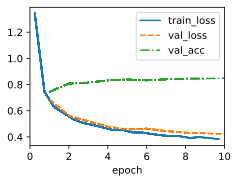

In [142]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = FashionMNIST(batch_size=256)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)

#### 5.2.2. Concise Implementation

##### 5.2.2.1. Model

In [143]:
class MLP(Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens, activation='relu'),
            tf.keras.layers.Dense(num_outputs)])

##### 5.2.2.2. Training

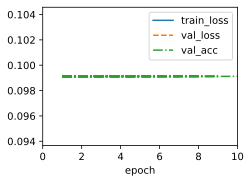

In [144]:
model = MLP(num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)

## 5.3. **Forward Propagation, Backward Propagation, and Computational Graphs**

#### 5.3.1. Forward Propagation

순전파 = 주어진 input에 따라 output layer를 계산한다. 여태까지 구현했던 것 중 forward가 순전파에 해당.

#### 5.3.3. Backward Propagation

$\frac{\partial \mathsf{Z}}{\partial \mathsf{X}} = \text{prod}\left(\frac{\partial \mathsf{Z}}{\partial \mathsf{Y}}, \frac{\partial \mathsf{Y}}{\partial \mathsf{X}}\right).$

역전파는 신경망에서 Gradient를 구하는 데 쓰인다. Chain Rule을 통해 Output Layer의 Loss에 대한 Gradient에서 출발해서 각 Weight의 Loss에 대한 Gradient를 구할 수 있다 (Automatic Differentiation 참조) 이걸로 GD 수행 가능능

## 5.4. Numerical Stability and Initialization

##### 5.4.1.1. Vanishing Gradients

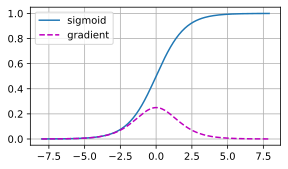

In [145]:
x = tf.Variable(tf.range(-8.0, 8.0, 0.1))
with tf.GradientTape() as t:
    y = tf.nn.sigmoid(x)
d2l.plot(x.numpy(), [y.numpy(), t.gradient(y, x).numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

sigmoid 함수 => input 값이 크거나 작으면 gradient가 0으로 수렴 => Gradient Descent를 하면 학습이 잘 안됨

##### Exploding Gradient

In [146]:
M = tf.random.normal((4, 4))
print('a single matrix \n', M)
for i in range(100):
    M = tf.matmul(M, tf.random.normal((4, 4)))
print('after multiplying 100 matrices\n', M.numpy())

a single matrix 
 tf.Tensor(
[[ 0.5835949  -0.52296907  0.3131977   1.0346416 ]
 [ 0.35451415 -1.3040208   0.88857543 -0.38030505]
 [-0.76089513 -1.2059747  -0.09004444  0.08275257]
 [-0.6789521  -1.3090013  -1.4695498  -0.7498355 ]], shape=(4, 4), dtype=float32)
after multiplying 100 matrices
 [[-1.4542801e+22  6.1378355e+21  9.6065552e+21 -4.0458362e+22]
 [-1.5207111e+22  6.4182104e+21  1.0045379e+22 -4.2306477e+22]
 [-1.2398473e+22  5.2328157e+21  8.1900718e+21 -3.4492790e+22]
 [-1.3577726e+22  5.7305243e+21  8.9690538e+21 -3.7773501e+22]]


이건 반대로 Gradient가 발산하는 현상이다. => 이것 또한 학습이 제대로 안됨

### 5.4.2. Parameter Initialization

##### 5.4.2.1. Default Initialization

정규분포로 초기화하는 방법. D2L에서는 주로 평균 0, sigma=0.01인 정규분포로 초기화하였다.

##### 5.4.2.2. Xavier Initialization

$o_{i} = \sum_{j=1}^{n_\mathrm{in}} w_{ij} x_j.$

$\begin{split}\begin{aligned}
    E[o_i] & = \sum_{j=1}^{n_\mathrm{in}} E[w_{ij} x_j] \\&= \sum_{j=1}^{n_\mathrm{in}} E[w_{ij}] E[x_j] \\&= 0, \\
    \mathrm{Var}[o_i] & = E[o_i^2] - (E[o_i])^2 \\
        & = \sum_{j=1}^{n_\mathrm{in}} E[w^2_{ij} x^2_j] - 0 \\
        & = \sum_{j=1}^{n_\mathrm{in}} E[w^2_{ij}] E[x^2_j] \\
        & = n_\mathrm{in} \sigma^2 \gamma^2.
\end{aligned}\end{split}$

Output에 대한 분산 유지

$n_\mathrm{in} \sigma^2 = 1$

분산 발산이 안되려면?

$n_\mathrm{out} \sigma^2 = 1$

$\begin{aligned}
\frac{1}{2} (n_\mathrm{in} + n_\mathrm{out}) \sigma^2 = 1 \text{ or equivalently }
\sigma = \sqrt{\frac{2}{n_\mathrm{in} + n_\mathrm{out}}}.
\end{aligned}$

다음의 균등분포로 초기화

$U\left(-\sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}, \sqrt{\frac{6}{n_\mathrm{in} + n_\mathrm{out}}}\right).$


## 5.6. Dropout

Dropout = Feature에 대한 오버피팅 방지

In [147]:
def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    if dropout == 1: return tf.zeros_like(X)
    mask = tf.random.uniform(
        shape=tf.shape(X), minval=0, maxval=1) < 1 - dropout
    return tf.cast(mask, dtype=tf.float32) * X / (1.0 - dropout)

In [148]:
X = tf.reshape(tf.range(16, dtype=tf.float32), (2, 8))
print('dropout_p = 0:', dropout_layer(X, 0))
print('dropout_p = 0.5:', dropout_layer(X, 0.5))
print('dropout_p = 1:', dropout_layer(X, 1))

dropout_p = 0: tf.Tensor(
[[ 0.  1.  2.  3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]], shape=(2, 8), dtype=float32)
dropout_p = 0.5: tf.Tensor(
[[ 0.  0.  4.  6.  8. 10. 12.  0.]
 [16. 18. 20.  0.  0.  0. 28. 30.]], shape=(2, 8), dtype=float32)
dropout_p = 1: tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]], shape=(2, 8), dtype=float32)


##### 5.6.2.1. Defining the Model

In [149]:
class DropoutMLPScratch(Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.lin1 = tf.keras.layers.Dense(num_hiddens_1, activation='relu')
        self.lin2 = tf.keras.layers.Dense(num_hiddens_2, activation='relu')
        self.lin3 = tf.keras.layers.Dense(num_outputs)

    def forward(self, X):
        H1 = self.lin1(tf.reshape(X, (X.shape[0], -1)))
        if self.training:
            H1 = dropout_layer(H1, self.dropout_1)
        H2 = self.lin2(H1)
        if self.training:
            H2 = dropout_layer(H2, self.dropout_2)
        return self.lin3(H2)

##### 5.6.2.2. Training

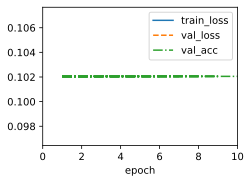

In [150]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = DropoutMLPScratch(**hparams)
data = FashionMNIST(batch_size=256)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)

???

#### 5.6.3. Concise Implementation

In [151]:
class DropoutMLP(Classifier):
    def __init__(self, num_outputs, num_hiddens_1, num_hiddens_2,
                 dropout_1, dropout_2, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(num_hiddens_1, activation=tf.nn.relu),
            tf.keras.layers.Dropout(dropout_1),
            tf.keras.layers.Dense(num_hiddens_2, activation=tf.nn.relu),
            tf.keras.layers.Dropout(dropout_2),
            tf.keras.layers.Dense(num_outputs)])

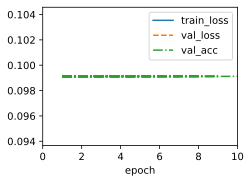

In [152]:
model = DropoutMLP(**hparams)
trainer.fit(model, data)

?????????????????

## 5.7. **Predicting House Prices on Kaggle**


In [153]:
%matplotlib inline
import pandas as pd
import tensorflow as tf
from d2l import tensorflow as d2l
import hashlib
import os
import tarfile
import zipfile
import requests

In [175]:
@add_to_class(HyperParameters)
def save_hyperparameters(self, ignore=[]):
    """Save function arguments into class attributes."""
    frame = inspect.currentframe().f_back
    _, _, _, local_vars = inspect.getargvalues(frame)
    self.hparams = {k:v for k, v in local_vars.items()
                    if k not in set(ignore+['self']) and not k.startswith('_')}
    for k, v in self.hparams.items():
        setattr(self, k, v)

@add_to_class(ProgressBoard)
def draw(self, x, y, label, every_n=1):
    Point = collections.namedtuple('Point', ['x', 'y'])
    if not hasattr(self, 'raw_points'):
        self.raw_points = collections.OrderedDict()
        self.data = collections.OrderedDict()
    if label not in self.raw_points:
        self.raw_points[label] = []
        self.data[label] = []
    points = self.raw_points[label]
    line = self.data[label]
    points.append(Point(x, y))
    if len(points) != every_n:
        return
    mean = lambda x: sum(x) / len(x)
    line.append(Point(mean([p.x for p in points]),
                      mean([p.y for p in points])))
    points.clear()
    if not self.display:
        return
    d2l.use_svg_display()
    if self.fig is None:
        self.fig = d2l.plt.figure(figsize=self.figsize)
    plt_lines, labels = [], []
    for (k, v), ls, color in zip(self.data.items(), self.ls, self.colors):
        plt_lines.append(d2l.plt.plot([p.x for p in v], [p.y for p in v],
                                      linestyle=ls, color=color)[0])
        labels.append(k)
    axes = self.axes if self.axes else d2l.plt.gca()
    if self.xlim: axes.set_xlim(self.xlim)
    if self.ylim: axes.set_ylim(self.ylim)
    if not self.xlabel: self.xlabel = self.x
    axes.set_xlabel(self.xlabel)
    axes.set_ylabel(self.ylabel)
    axes.set_xscale(self.xscale)
    axes.set_yscale(self.yscale)
    axes.legend(plt_lines, labels)
    display.display(self.fig)
    display.clear_output(wait=True)

In [154]:
def download(url, folder='../data', sha1_hash=None):
    """Download a file to folder and return the local filepath."""
    if not url.startswith('http'):
        # For back compatability
        url, sha1_hash = DATA_HUB[url]
    os.makedirs(folder, exist_ok=True)
    fname = os.path.join(folder, url.split('/')[-1])
    # Check if hit cache
    if os.path.exists(fname) and sha1_hash:
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname
    # Download
    print(f'Downloading {fname} from {url}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname

def extract(filename, folder=None):
    """Extract a zip/tar file into folder."""
    base_dir = os.path.dirname(filename)
    _, ext = os.path.splitext(filename)
    assert ext in ('.zip', '.tar', '.gz'), 'Only support zip/tar files.'
    if ext == '.zip':
        fp = zipfile.ZipFile(filename, 'r')
    else:
        fp = tarfile.open(filename, 'r')
    if folder is None:
        folder = base_dir
    fp.extractall(folder)

In [155]:
class KaggleHouse(DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(
                'kaggle_house_train', self.root))
            self.raw_val = pd.read_csv(d2l.download(
                'kaggle_house_test', self.root))

In [156]:
data = KaggleHouse(batch_size=64)
print(data.raw_train.shape)
print(data.raw_val.shape)

(1460, 81)
(1459, 80)


#### 5.7.4. Data Preprocessing

2장 Data Manipulation 참조조

In [157]:
print(data.raw_train.iloc[:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [158]:
@add_to_class(KaggleHouse)
def preprocess(self):
    # Remove the ID and label columns
    label = 'SalePrice'
    features = pd.concat(
        (self.raw_train.drop(columns=['Id', label]),
         self.raw_val.drop(columns=['Id'])))
    # Standardize numerical columns
    numeric_features = features.dtypes[features.dtypes!='object'].index
    features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std()))
    # Replace NAN numerical features by 0
    features[numeric_features] = features[numeric_features].fillna(0)
    # Replace discrete features by one-hot encoding
    features = pd.get_dummies(features, dummy_na=True)
    # Save preprocessed features
    self.train = features[:self.raw_train.shape[0]].copy()
    self.train[label] = self.raw_train[label]
    self.val = features[self.raw_train.shape[0]:].copy()

In [159]:
data.preprocess()
data.train.shape

(1460, 332)

#### 5.7.5. Error Measure

$\sqrt{\frac{1}{n}\sum_{i=1}^n\left(\log y_i -\log \hat{y}_i\right)^2}$

In [172]:
@add_to_class(KaggleHouse)
def get_dataloader(self, train):
    label = 'SalePrice'
    data = self.train if train else self.val
    if label not in data: return
    get_tensor = lambda x: tf.constant(x.values, dtype=tf.float32)
    # Logarithm of prices
    tensors = (get_tensor(data.drop(columns=[label])),  # X
               tf.reshape(tf.math.log(get_tensor(data[label])), (-1, 1)))  # Y
    return self.get_tensorloader(tensors, train)

#### 5.7.6. K-Fold Cross-Validation

K개의 batch로 나눴을 때, 각 subset에 대해 나머지 subset으로 training을 하고 남은 하나로 validate => K번 수행해서 오차를 평균 낸다

In [173]:
def k_fold_data(data, k):
    rets = []
    fold_size = data.train.shape[0] // k
    for j in range(k):
        idx = range(j * fold_size, (j+1) * fold_size)
        rets.append(KaggleHouse(data.batch_size, data.train.drop(index=idx),
                                data.train.loc[idx]))
    return rets

def k_fold(trainer, data, k, lr):
    val_loss, models = [], []
    for i, data_fold in enumerate(k_fold_data(data, k)):
        model = LinearRegression(lr)
        model.board.yscale='log'
        if i != 0: model.board.display = False
        trainer.fit(model, data_fold)
        val_loss.append(float(model.board.data['val_loss'][-1].y))
        models.append(model)
    print(f'average validation log mse = {sum(val_loss)/len(val_loss)}')
    return models

In [176]:
trainer = Trainer(max_epochs=10)
models = k_fold(trainer, data, k=5, lr=0.01)

InvalidArgumentError: ignored

Tensorflow는 쓸 게 못 되는 것 같다